In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [35]:
imdb = pd.read_csv('IMDb Movies India.csv',encoding='latin1')
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [36]:
imdb.shape

(15509, 10)

In [37]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [38]:
imdb.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [39]:
imdb.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [40]:
imdb.drop_duplicates(inplace=True)

In [41]:
#removing null values from main features
imdb.dropna(subset=['Name','Year','Duration','Votes','Rating'],inplace=True)
imdb.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [42]:
imdb = imdb.dropna(subset=['Votes'])
imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [43]:
#Removing Paranthesis from Column Year and converting to integer
imdb['Year'] = imdb['Year'].str.strip('()').astype(int)

In [44]:
#Removing commas from Votes Column and convert to integer
imdb['Votes'] = imdb['Votes'].astype(str)
imdb['Votes'] = imdb['Votes'].str.replace(',', '').astype(int)

In [45]:
#Removing 'min' from Duration column and converting to integer
imdb['Duration'] = imdb['Duration'].str.replace('min', '').astype(int)
imdb['Duration'].fillna(imdb['Duration'].mean(), inplace=True)

In [46]:
imdb.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


<Axes: xlabel='Year', ylabel='Count'>

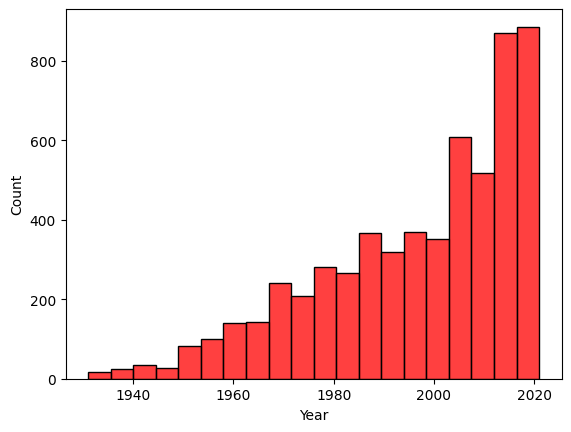

In [47]:
sns.histplot(imdb['Year'], bins=20, kde=False, color='red')

<Axes: xlabel='Duration', ylabel='Count'>

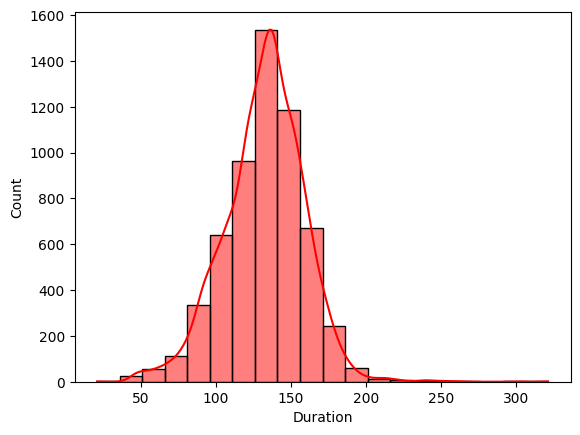

In [48]:
sns.histplot(imdb['Duration'], bins=20, kde=True, color='red')

<Axes: xlabel='Rating', ylabel='Count'>

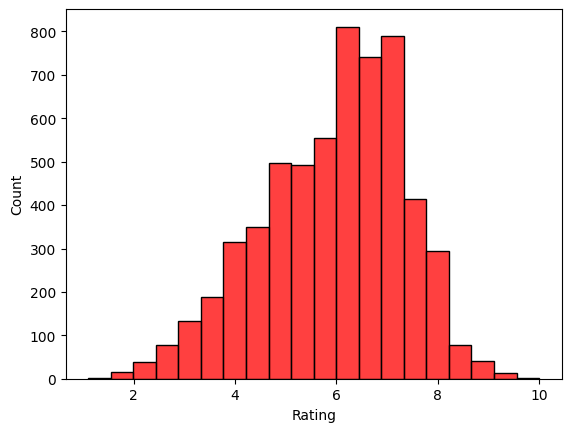

In [49]:
sns.histplot(imdb['Rating'], bins=20, kde=False, color='red')

<Axes: xlabel='Votes', ylabel='Count'>

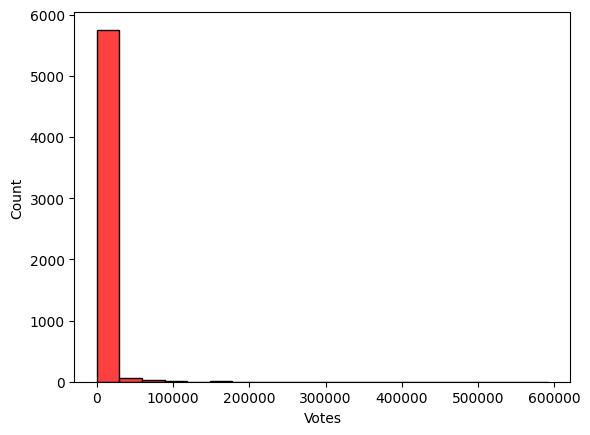

In [50]:
sns.histplot(imdb['Votes'], bins=20, kde=False, color='red')

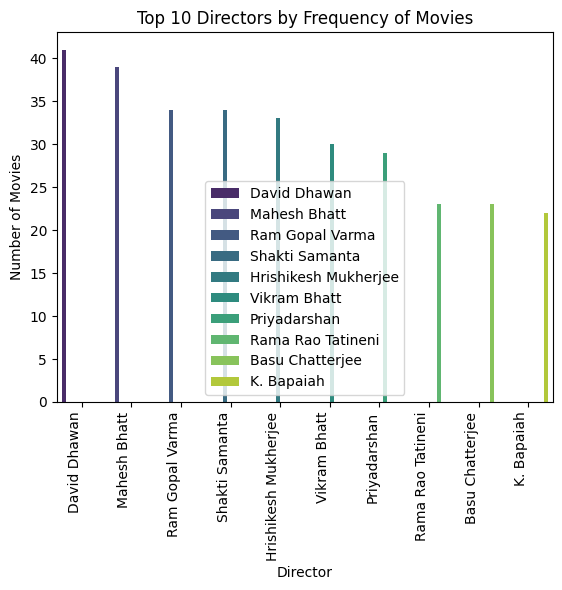

In [51]:
director_counts = imdb['Director'].value_counts().head(10)
sns.barplot(x=director_counts.index, y=director_counts.values, hue=director_counts.index, palette='viridis')
plt.title('Top 10 Directors by Frequency of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.show()

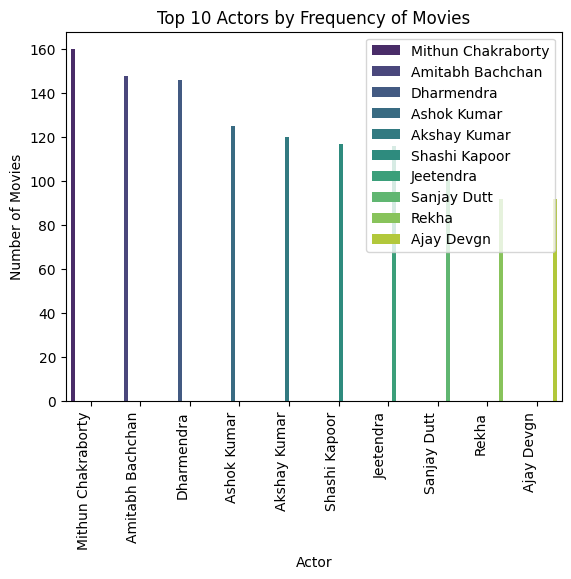

In [52]:
actors = pd.concat([imdb['Actor 1'], imdb['Actor 2'], imdb['Actor 3']])
actor_counts = actors.value_counts().head(10)
sns.barplot(x=actor_counts.index, y=actor_counts.values, hue=actor_counts.index , palette='viridis')
plt.title('Top 10 Actors by Frequency of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.show()

In [53]:
imdb.drop(['Name','Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
imdb.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [54]:
X = imdb[['Year','Duration','Votes']]
y = imdb['Rating']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [56]:
model = LinearRegression()

In [57]:
model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = model.predict(X_test)

In [59]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.0668333990630774
Mean Squared Error: 1.794550107978933
R-squared: 0.035455931518244665


In [60]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor Mean Absolute Error:", mae_gb)
print("Gradient Boosting Regressor Mean Squared Error:", mse_gb)
print("Gradient Boosting Regressor R-squared:", r2_gb)

Gradient Boosting Regressor Mean Absolute Error: 0.8990015571902661
Gradient Boosting Regressor Mean Squared Error: 1.3858172910679973
Gradient Boosting Regressor R-squared: 0.25514375878615314
